### Image Equalization

In [1]:
# Importing libraries
import os
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

checking for root directory

In [2]:
pwd

'C:\\Users\\Ezekiel\\Documents\\BACUNGAN_GVC'

displaying a list of image files

In [3]:
# creating a file list
file_list = []
for (root, dirs, files) in os.walk(os.getcwd()):
    for f in files:
        if f.endswith(('jpg', 'jpeg', 'png')): # get all image files
            file_list.append(os.path.join(root, f))

# display all the image files with index number
counter = 0;
for file in file_list:
    print(counter,file)
    counter = counter + 1;

0 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\cameraman.jpg
1 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\blank_canvas_blue_rectangle.png
2 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\blank_canvas_blue_rectangle_resize.png
3 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\blank_canvas_blue_rectangle_revise.png
4 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\blank_canvas_violet_rectangle.png
5 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\cameraman.jpg
6 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\lotion_gray.jpg
7 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\shapes1.jpg
8 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\splash_gray.jpg
9 C:\Users\Ezekiel\Documents\BACUNGAN_GVC\resources\squirel.jpg


In [4]:
# loading the image, use squirel.jpg
image_file_path_squirel = file_list[9]
squirel = cv2.imread(image_file_path_squirel)

# getting the color channel
squirel_blue_channel = squirel[:,:,0]
squirel_green_channel = squirel[:,:,1]
squirel_red_channel = squirel[:,:,2]

Apply histogram equalization to the 3 color channels

In [5]:
# Histogram Equalization of 3 channels
squirel_blue_channel_eq = cv2.equalizeHist(squirel_blue_channel)
squirel_blue_channel_eq_hist = cv2.calcHist([squirel_blue_channel_eq], [0], None, [256], [0, 256])
# plt.plot(squirel_blue_channel_eq_hist, color='b')

squirel_red_channel_eq = cv2.equalizeHist(squirel_red_channel)
squirel_red_channel_eq_hist = cv2.calcHist([squirel_red_channel_eq], [0], None, [256], [0, 256])
# plt.plot(squirel_red_channel_eq_hist, color='r')

squirel_green_channel_eq = cv2.equalizeHist(squirel_green_channel)
squirel_green_channel_eq_hist = cv2.calcHist([squirel_green_channel_eq], [0], None, [256], [0, 256])
# plt.plot(squirel_red_channel_eq_hist, color='g')

<function matplotlib.pyplot.show(close=None, block=None)>

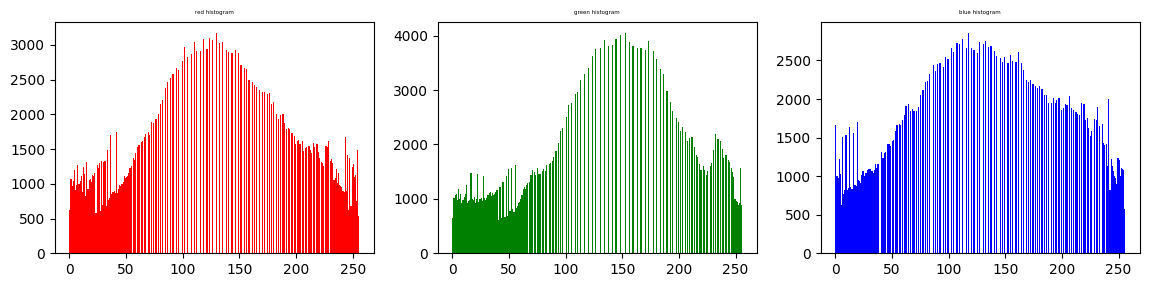

In [6]:
# display the 3 equalized color channels
plt.figure(figsize=(14,3))

plt.subplot(1, 3, 1)
plt.title("red histogram", fontsize=4)
plt.hist(squirel_red_channel_eq.flatten(), 256, [0,256], color="red")
plt.show

plt.subplot(1, 3, 2)
plt.title("green histogram", fontsize=4)
plt.hist(squirel_green_channel_eq.flatten(), 256, [0,256], color="green")
plt.show

plt.subplot(1, 3, 3)
plt.title("blue histogram", fontsize=4)
plt.hist(squirel_blue_channel_eq.flatten(), 256, [0,256], color="blue")
plt.show

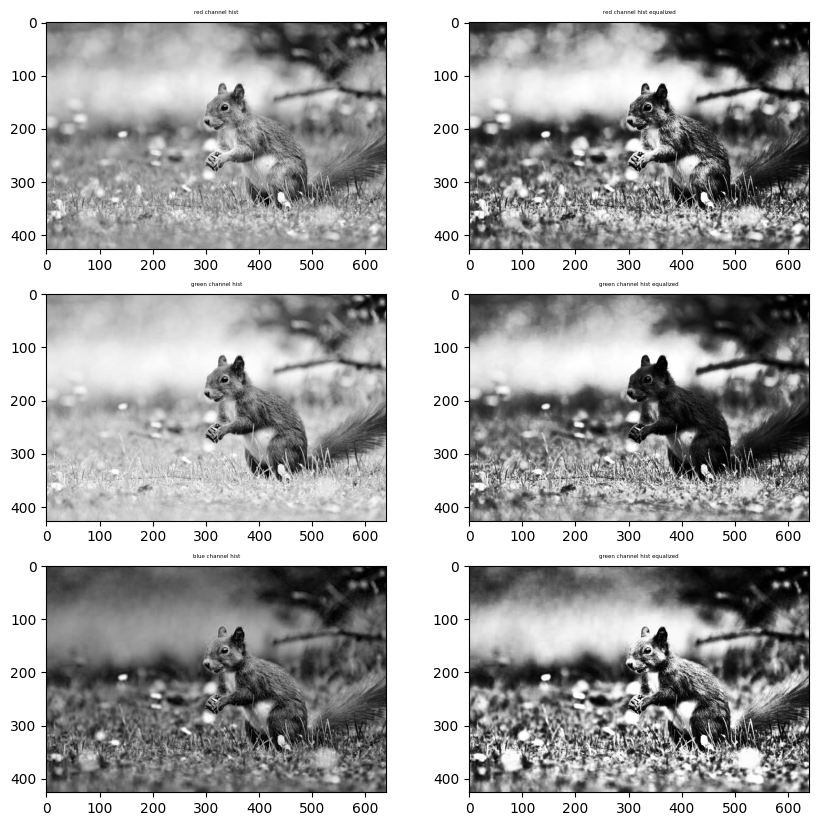

In [7]:
# side by side display of the unequalized color channels vs equalized color channels
plt.figure(figsize=(10,10))

plt.subplot(3, 2, 1)
plt.title("red channel hist", fontsize=4)
plt.imshow(squirel_red_channel, plt.cm.gray)

plt.subplot(3, 2, 2)
plt.title("red channel hist equalized", fontsize=4)
plt.imshow(squirel_red_channel_eq, plt.cm.gray)

plt.subplot(3, 2, 3)
plt.title("green channel hist", fontsize=4)
plt.imshow(squirel_green_channel, plt.cm.gray)

plt.subplot(3, 2, 4)
plt.title("green channel hist equalized", fontsize=4)
plt.imshow(squirel_green_channel_eq, plt.cm.gray)

plt.subplot(3, 2, 5)
plt.title("blue channel hist", fontsize=4)
plt.imshow(squirel_blue_channel, plt.cm.gray)

plt.subplot(3, 2, 6)
plt.title("green channel hist equalized", fontsize=4)
plt.imshow(squirel_blue_channel_eq, plt.cm.gray)

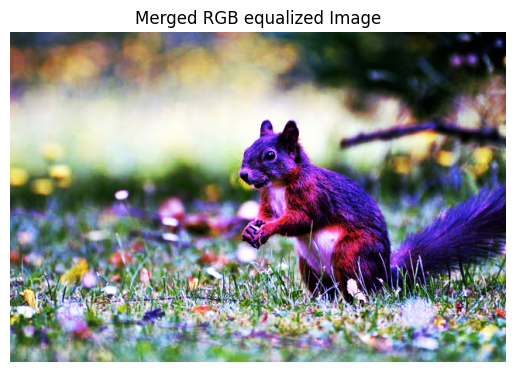

In [12]:
# merging the equalized color channels
merged_equalized_rgb = np.stack((squirel_red_channel_eq, 
                                 squirel_green_channel_eq, 
                                 squirel_blue_channel_eq), axis=2)

plt.imshow(merged_equalized_rgb)
plt.title("Merged RGB equalized Image")
plt.axis('off')
plt.show()